## Evaluating complete dataset (March 2020 - December 2020/Jan 1 2021)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

transformar_features = False
data = pd.read_csv('../dados-para-modelos/2015/top100_linhas_data_model_2015.csv', sep=',', delimiter=',')
# busline_filter = 41
# data_model = data.loc[data['linha'] == busline_filter]
# display(data_model)

In [23]:
print('Quantidade de Linhas de Onibus: ', len(data.linha.unique()))
# data

Quantidade de Linhas de Onibus:  100


In [24]:
data

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes,domingo,segunda,terca,quarta,quinta,sexta,sabado,feriado,vespera_feriado
0,1,2015-01-15 02:00:00,0,3,5.195840e-01,0.854419,2,15,15,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
1,1,2015-01-25 02:00:00,0,6,5.195840e-01,0.854419,2,25,25,1,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
2,1,2015-01-25 06:00:00,0,6,9.976688e-01,-0.068242,6,25,25,1,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
3,1,2015-01-25 07:00:00,0,6,9.422609e-01,-0.334880,7,25,25,1,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
4,1,2015-01-25 08:00:00,0,6,8.169699e-01,-0.576680,8,25,25,1,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815397,920,2015-12-31 19:00:00,234,3,-8.878852e-01,0.460065,19,31,365,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
815398,920,2015-12-31 20:00:00,240,3,-7.308360e-01,0.682553,20,31,365,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
815399,920,2015-12-31 21:00:00,222,3,-5.195840e-01,0.854419,21,31,365,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
815400,920,2015-12-31 22:00:00,147,3,-2.697968e-01,0.962917,22,31,365,12,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1


## Sazonalidade Anual / Dia

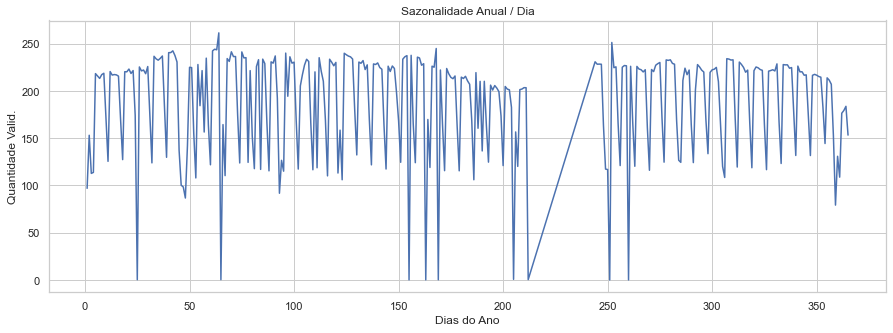

In [25]:
plt.figure(figsize=(15,5))
plt.xlabel('Dias do Ano')
plt.ylabel('Quantidade Valid.')
plt.title("Sazonalidade Anual / Dia")
sns.lineplot(x="d_ano", y="validations_per_hour", data=data, markers=True, dashes=False, ci=None)
#plt.plot(data['d_ano'], data['validations_per_hour'], 'b--')
plt.show()

## Relacao QTD de validacoes Mensais

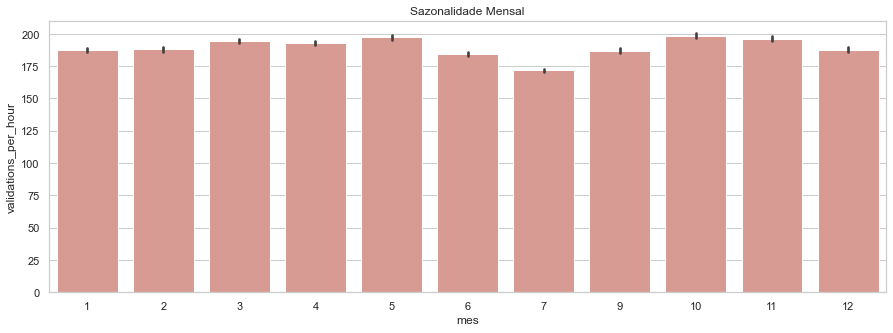

In [26]:
plt.figure(figsize=(15,5))
plt.xlabel('Meses')
plt.ylabel('Quantidade Valid.')
plt.title("Sazonalidade Mensal")
sns.set_theme(style="whitegrid")
sns.barplot(x="mes", y="validations_per_hour", data=data, color='salmon', saturation=.5)
#plt.plot(data['mes'], data['validations_per_hour'], kind='bar')
plt.show()

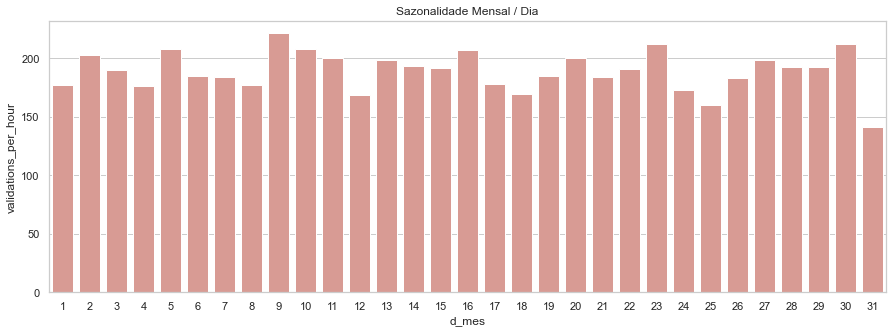

In [27]:

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Mensal / Dia")
sns.barplot(x="d_mes", y="validations_per_hour", data=data, color="salmon", saturation=.5, ci=None)
#plt.plot(data['d_mes'], data['validations_per_hour'], 'b--')
plt.show()

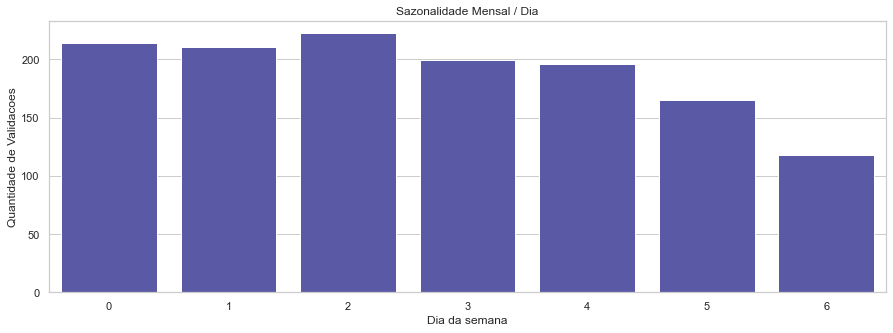

In [28]:
plt.figure(figsize=(15,5))
plt.title("Sazonalidade Mensal / Dia")
ax = sns.barplot(x='d_semana', y='validations_per_hour', data=data, color="blue", saturation=.3, ci=None)
ax.set(xlabel='Dia da semana', ylabel='Quantidade de Validacoes')
plt.savefig('../images/2015/sazonalidade_hora_barplot.pdf')
plt.show()

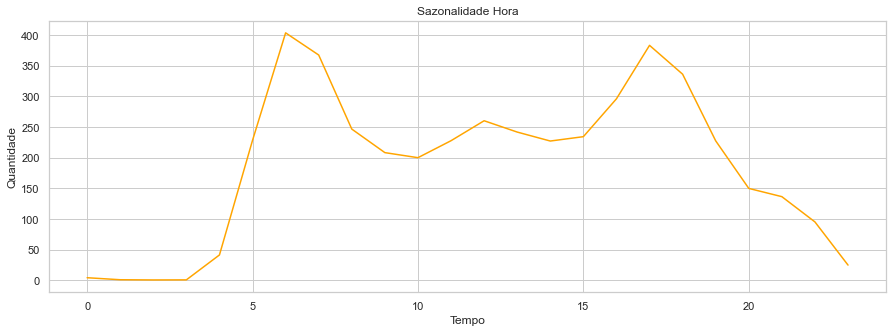

In [29]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data, ci=None, color='orange')
plt.savefig('../images/2015/sazonalidade_hora.pdf')
plt.show()


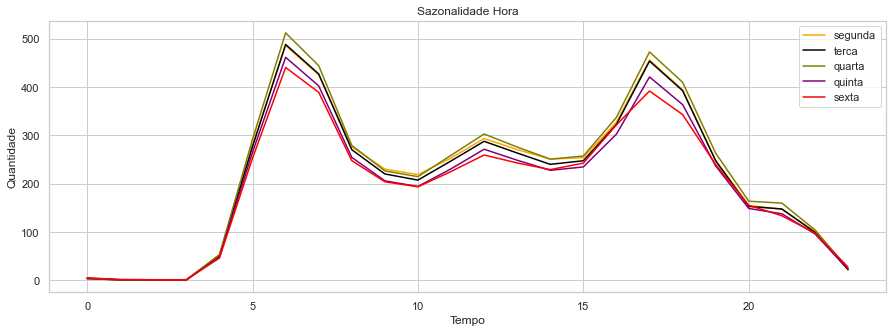

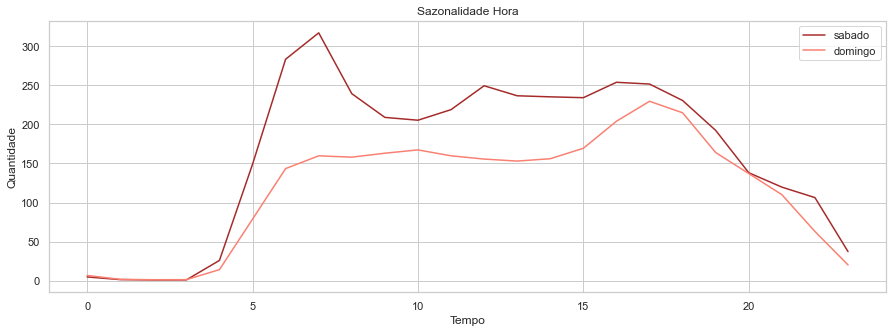

In [30]:
colors = ['orange', 'red', 'black', 'green', 'purple', 'olive', 'cyan']

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 0], ci=None, color='orange', label='segunda')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 1], ci=None, color='black', label='terca')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 2], ci=None, color='olive', label='quarta')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 3], ci=None, color='purple', label='quinta')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 4], ci=None, color='red', label='sexta')
plt.savefig(f'../images/2015/sazonalidade_hora_diadasemana_diasuteis.pdf')
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Sazonalidade Hora")
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 5], ci=None, color='brown', label='sabado')
sns.lineplot(x='hora', y='validations_per_hour', data=data.loc[data.d_semana == 6], ci=None, color='salmon', label='domingo')
plt.savefig(f'../images/2015/sazonalidade_hora_diadasemana_fds.pdf')
plt.show()

## Visualizacao das Linhas

### Ranking (top 10 / 100)
Ranking feito atraves do comparativo entre os 
modelos mais performaticos analisados: (exemplo abaixo feito sob a linha 41)  
- Stacking Regressors  
- RandomForest GridSearched  
- RandomForest Default  
- RandomForest Bagging  
- GradientBoostingRegressor  
- LinearRegression Bagging  
- LinearReg GridSearched  
- LinearReg Default  

In [31]:
data = pd.read_csv('../performances/2015/ranking_top100_2015.csv', sep=',', delimiter=',')
ranking = data.sort_values('MAE', ascending=True).drop_duplicates(subset=['Linha'])
ranking.head(10)

,Linha,R2,RMSE,MAE,MAPE
0,339,0.902078,12.258247,8.128344,8.566545e+16
1,325,0.889047,13.348829,8.413255,1.003063e+17
2,330,0.926493,15.349761,8.781561,2.324854e+17
3,332,0.845172,14.072540,8.966417,1.147572e+17
9,304,0.921245,14.349389,9.683315,7.989371e+16
12,814,0.947820,16.472910,9.718388,2.028813e+17
21,383,0.877852,16.616354,10.446012,1.904912e+17
23,361,0.848545,16.132088,10.716207,7.292134e+16
24,342,0.953022,21.116394,10.881329,2.530433e+17
26,356,0.909513,16.550991,10.971319,1.297724e+17


In [32]:
data_m = pd.read_csv('../data_input_zerofill_2015.csv', delimiter=";")

In [33]:
data_m

,linha,data_hora,validations_per_hour,d_semana,hour_sin,hour_cos,hora,d_mes,d_ano,mes,semana_do_mes
0,1,2015-01-15 02:00:00,0,3,0.519584,0.854419,2,15,15,1,3
1,1,2015-01-25 02:00:00,0,6,0.519584,0.854419,2,25,25,1,4
2,1,2015-01-25 06:00:00,0,6,0.997669,-0.068242,6,25,25,1,4
3,1,2015-01-25 07:00:00,0,6,0.942261,-0.334880,7,25,25,1,4
4,1,2015-01-25 08:00:00,0,6,0.816970,-0.576680,8,25,25,1,4
...,...,...,...,...,...,...,...,...,...,...,...
2081985,999,2015-12-05 09:00:00,18,5,0.631088,-0.775711,9,5,339,12,0
2081986,999,2015-12-05 10:00:00,64,5,0.398401,-0.917211,10,5,339,12,0
2081987,999,2015-12-05 11:00:00,8,5,0.136167,-0.990686,11,5,339,12,0
2081988,999,2015-12-05 12:00:00,43,5,-0.136167,-0.990686,12,5,339,12,0


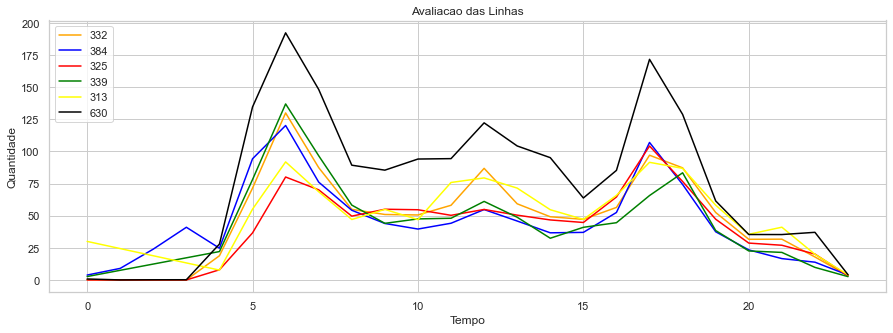

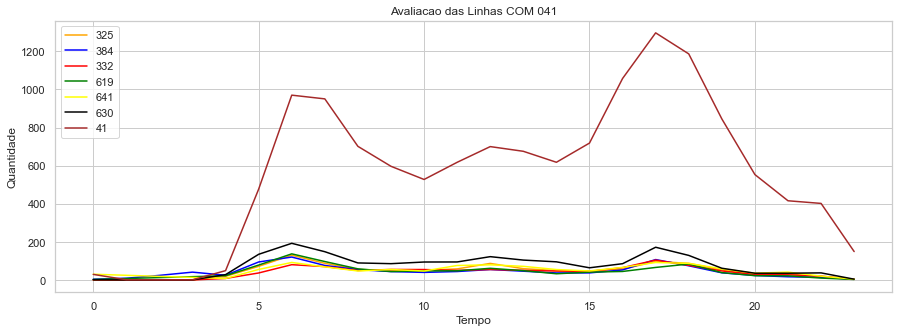

In [34]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="339")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="313")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
# sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")

plt.legend(loc="upper left")
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas COM 041")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 325], ci=None, color='orange', label="325")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 384], ci=None, color='blue', label="384")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 332], ci=None, color='red', label="332")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 619], ci=None, color='green', label="619")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 641], ci=None, color='yellow', label="641")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 630], ci=None, color='black', label="630")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.linha == 41], ci=None, color='brown', label="41")
plt.legend(loc="upper left")
plt.show()

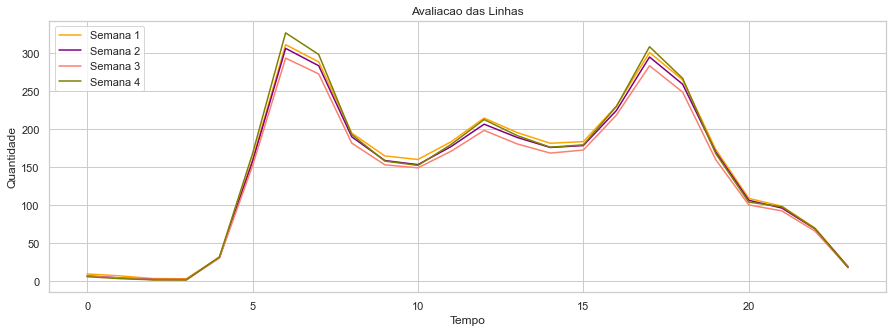

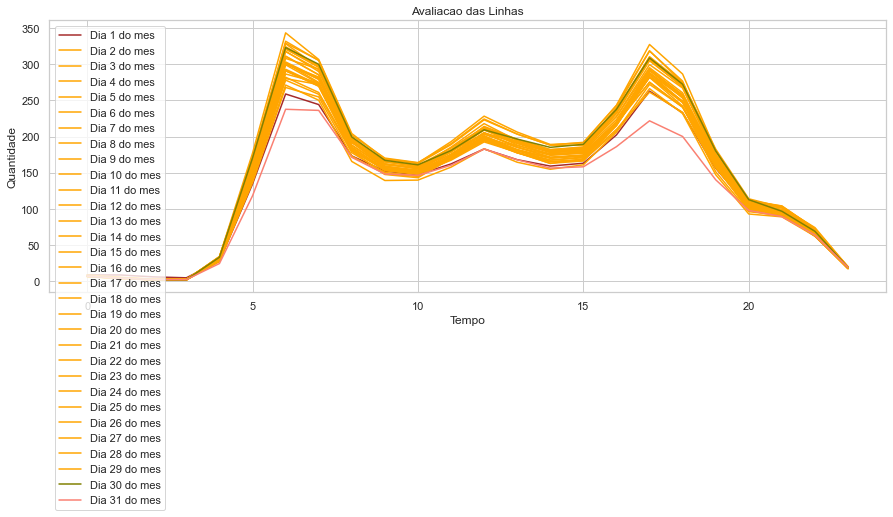

In [35]:
plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')

plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 1], ci=None, color='orange', label="Semana 1")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 2], ci=None, color='purple', label="Semana 2")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 3], ci=None, color='salmon', label="Semana 3")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.semana_do_mes == 4], ci=None, color='olive', label="Semana 4")
plt.legend(loc="upper left")
plt.savefig(f'../images/2015/sazonalidade_hora_semanas.pdf')

plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Tempo')
plt.ylabel('Quantidade')
plt.title("Avaliacao das Linhas")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == 1], ci=None, color='brown', label=f"Dia 1 do mes")
for i in range(2, 30):
    sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == i], ci=None, color='orange', label=f"Dia {i} do mes")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == 30], ci=None, color='olive', label=f"Dia 30 do mes")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.d_mes == 31], ci=None, color='salmon', label=f"Dia 31 do mes")
plt.legend(loc="upper left")
plt.show()

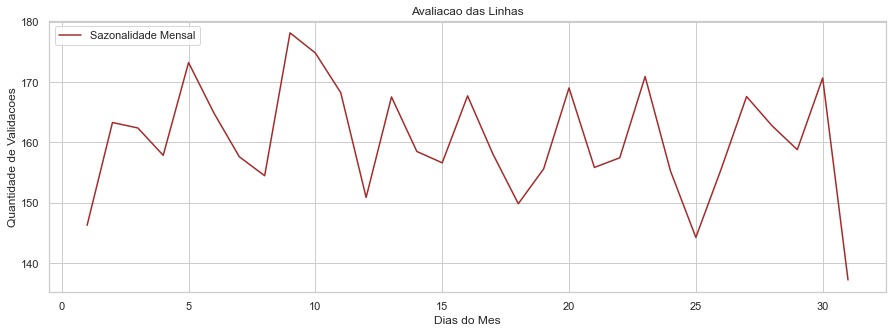

In [36]:
plt.figure(figsize=(15,5))
plt.xlabel('Dias do Mes')
plt.ylabel('Quantidade de Validacoes')
plt.title("Avaliacao das Linhas")
sns.lineplot(x='d_mes', y='validations_per_hour', data=data_m[data_m.d_mes <= 31], ci=None, color='brown', label=f"Sazonalidade Mensal")
plt.legend(loc="upper left")
plt.show()

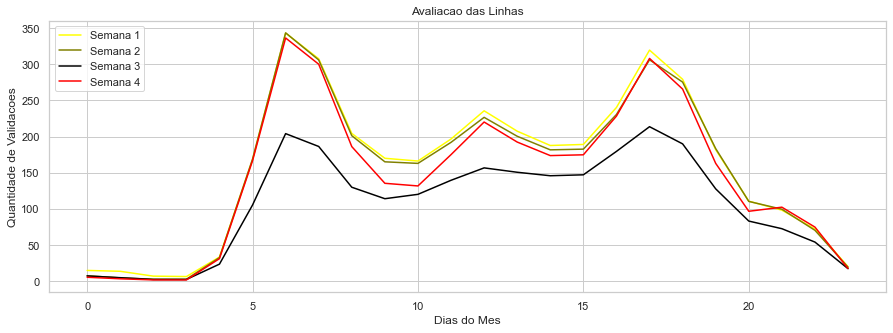

No handles with labels found to put in legend.


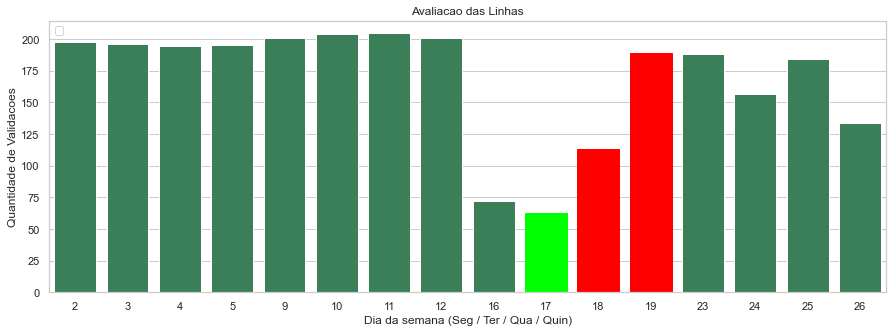

In [37]:
plt.figure(figsize=(15,5))
plt.xlabel('Dias do Mes')
plt.ylabel('Quantidade de Validacoes')
plt.title("Avaliacao das Linhas")

sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.mes == 2].loc[data_m.semana_do_mes == 1], ci=None, color='yellow', label=f"Semana 1")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.mes == 2].loc[data_m.semana_do_mes == 2], ci=None, color='olive', label=f"Semana 2")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.mes == 2].loc[data_m.semana_do_mes == 3], ci=None, color='black', label=f"Semana 3")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.mes == 2].loc[data_m.semana_do_mes == 4], ci=None, color='red', label=f"Semana 4")
plt.legend(loc="upper left")
plt.show()


dia_semana = ['domingo','segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado']


plt.figure(figsize=(15,5))
plt.xlabel('Dias do Mes')
plt.ylabel('Quantidade de Validacoes')
plt.title("Avaliacao das Linhas")
#1 quinta
ax = sns.barplot(x='d_mes', y='validations_per_hour', data=data_m[data_m.mes == 2].loc[data_m.d_semana.isin([0, 1, 2, 3])], ci=None, color='seagreen')
ax.set(xlabel='Dia da semana (Seg / Ter / Qua / Quin)', ylabel='Quantidade de Validacoes')
for bar in ax.patches:
    if bar.get_x() == 9.6 or bar.get_x() == 10.6:
        bar.set_color('red')
    if bar.get_x() == 8.6:
        bar.set_color('lime')
plt.savefig('../images/2015/fevereiro_carnaval_2018.pdf')
plt.legend(loc="upper left")
plt.show()

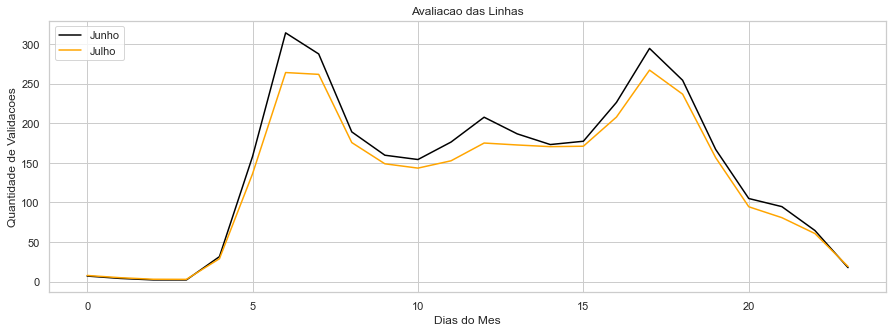

In [38]:
plt.figure(figsize=(15,5))
plt.xlabel('Dias do Mes')
plt.ylabel('Quantidade de Validacoes')
plt.title("Avaliacao das Linhas")

sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.mes == 6], ci=None, color='black', label=f"Junho")
sns.lineplot(x='hora', y='validations_per_hour', data=data_m[data_m.mes == 7], ci=None, color='orange', label=f"Julho")
plt.savefig('../images/2018/junho_julho_2018_comp.pdf')
plt.legend(loc="upper left")
plt.show()
